# Data Analysis on HEART HEALTH

In [2]:
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt

### Loading the data set


In [3]:
def load_dataset(file_path):
  return pd.read_csv(file_path)


df = load_dataset("./Health_heart_experimental.csv")


## Line graph for age vs DiaBP

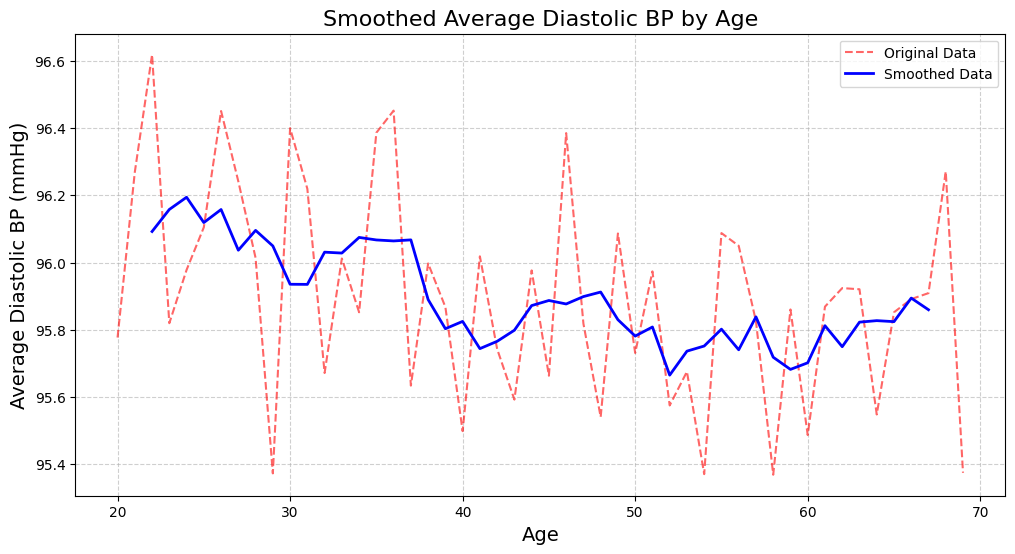

In [4]:
#grouping by age ( large amount of data)

age_bp_avg = df.groupby('age')['DiaBP'].mean().reset_index()

#Smoothing the data 

age_bp_avg['Smoothed_DiaBP'] = age_bp_avg['DiaBP'].rolling(window=5, center=True).mean()

# Ploting the original and smoothed data

plt.figure(figsize=(12, 6))
plt.plot(age_bp_avg['age'], age_bp_avg['DiaBP'], label="Original Data", color="red", linestyle="--", alpha=0.6)
plt.plot(age_bp_avg['age'], age_bp_avg['Smoothed_DiaBP'], label="Smoothed Data", color="blue",linewidth=2)

# Adding the titles and labels

plt.title("Smoothed Average Diastolic BP by Age", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Average Diastolic BP (mmHg)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()


There is not a general trend shown by above the line graph above. So,smoothing was done for a better analysis but even with smoothed data there is way to fluctuation in the line graph. Eve though there is a decending trend in Diastolic BP as the age increases it is drastically changing trend.To conlcude line graph might not be the way to represent the comparison between Average Diastolic BP and age.

## Bar graph 



indication  sex
0           0      18841
            1      18963
1           0      17105
            1      16851
dtype: int64


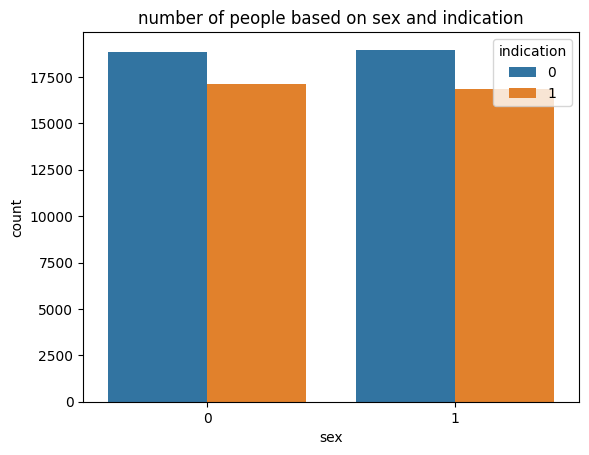

In [24]:
#ploting bar graph 

sns.countplot(data=df, x='sex', hue='indication')

#displaing the count

indication_sex_counts = df.groupby(['indication', 'sex']).size()
print(indication_sex_counts)
plt.title('number of people based on sex and indication')
plt.show()

The graph above shows that women(0) have a higher indication number than men(1). Demonstrating  that this sample has more women are keen to heart problem than men.

## Pie Chart

bmi_category
Higher than Good BMI    51281
Good BMI                14548
Less than Good BMI       5931
Name: count, dtype: int64


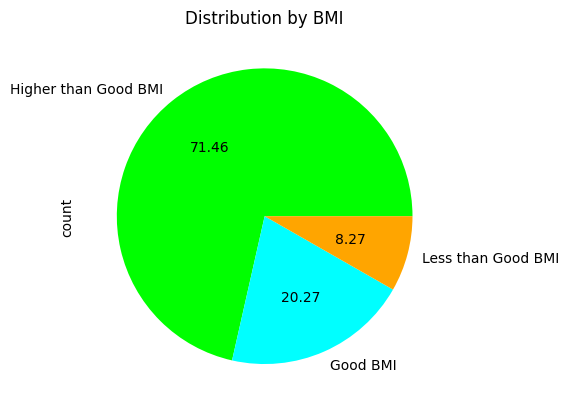

In [25]:
#Category of bmi

def bmi_category(bmi):
    if bmi < 18.5:
        return 'Less than Good BMI'
    elif 18.5 <= bmi <= 24.9:
        return 'Good BMI'
    else:
        return 'Higher than Good BMI'

df['bmi_category'] = df['BMI'].apply(bmi_category)

#plotting the pie chart

bmi_counts = df['bmi_category'].value_counts()
bmi_counts.plot(kind='pie', autopct='%0.2f', colors=['lime','cyan','orange'])

#displaing the number

print(bmi_counts)
plt.title('Distribution by BMI')
plt.show()

In the above pie chart it represents the BMI index of different people in this sample. It shows that more than seven tenth of people have a high BMI, suggesting  that a significant portion of the sample may be classified as overweight or obese. Morever signifying the high heart issue indication ratio in the sample.

## Box Plot


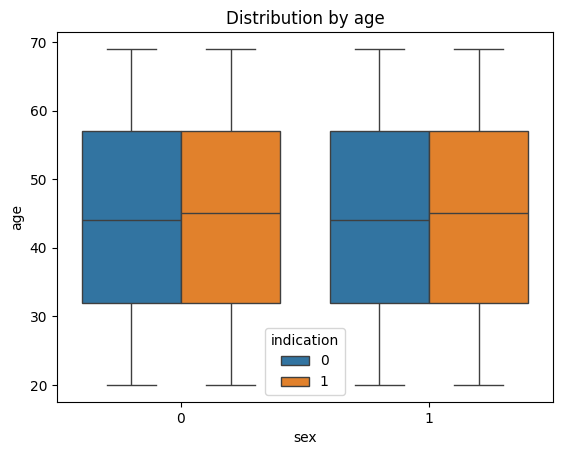

In [26]:
sns.boxplot(x='sex',y='age',hue='indication',data=df)
plt.title('Distribution by age')
plt.show()

The above is a box plot detailing the number of people by the age. It provides us context on the age of people present during this data collection. The range of people between 32-58 are dense suggesting data being taken from those in the hospital victiny for there checkups or visits. Since the median is slightly upper in indication(1) than indication(0), expresseing that elderly people are more prone to heart issues.

## Histogram

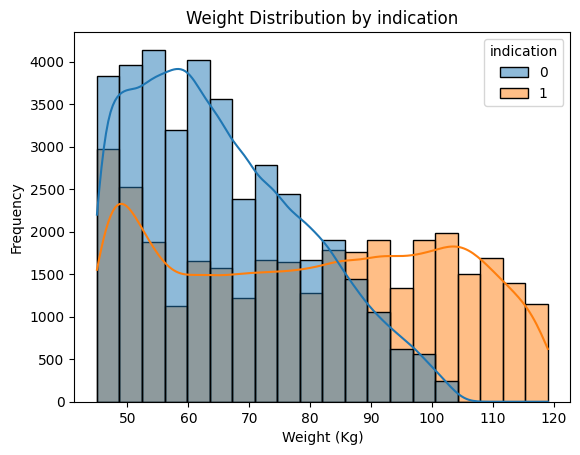

In [27]:
sns.histplot(data=df, x='weightKg', hue='indication', kde=True, bins=20)
plt.title('Weight Distribution by indication')
plt.xlabel('Weight (Kg)')
plt.ylabel('Frequency')
plt.show()


The above histogram shows the relationship between weight (kg) and indications of health issues. This figure further clarifies that people suffering from obesity are highly likely to experience heart-related problems. As weight increases, the number of people with no indications (indication 0) decreases at a high rate, signifying that individuals with higher body weight tend to have a greater likelihood of developing health complications.

## Scatter plot

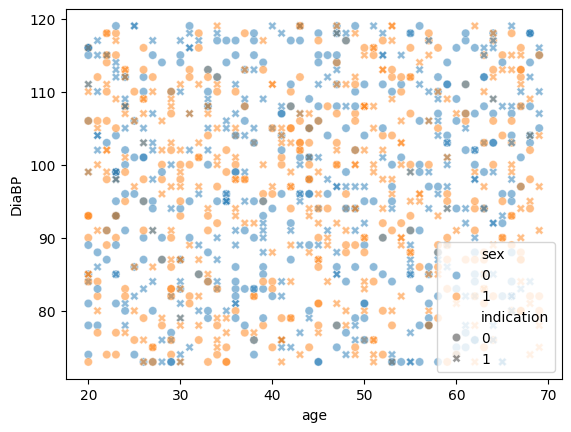

In [32]:
df_sample = df.sample(n=1000, random_state=42)
sns.scatterplot(x='age', y='DiaBP',hue='sex', style='indication',data=df_sample,alpha=0.5)
plt.show()

The scatter plot visualizes the relationship between age and diastolic blood pressure (DiaBP) across two categorical variables: sex (0 and 1) and indication (0 and 1). Points are differentiated by color for sex and by marker style for indication. No clear trend between age and DiaBP is immediately apparent, indicating no strong linear correlation, while the distribution appears uniform across groups.

# CONCLUSION


This study has highlighted that age, gender, and BMI are all important variables in determining factors of heart health. Although some trends, such as the prevalence of heart problems being higher in women and a high BMI leading to heart health risk, were quite apparent, others, such as how age relates to DiaBP, need further study.

These findings bring to the fore the need for a multidimensional approach toward heart health analysis, considering a wide range of variables and appropriate statistical methods to reach a meaningful pattern. Besides, public health strategies related to the management of obesity and addressing gender-based disparities in health may also serve as the key to better heart health outcomes. Further studies are needed to expand the dataset and explore longitudinal data for validation and building upon these insights.